<a href="https://colab.research.google.com/github/sean-ashley/cohere_playground/blob/main/cohere_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Unsupervised learning with Cohere's large embedder to find vegetable classes
I imported a list of various (culinarly) vegetable names, and embedded them using Coheres large embedder, and used HDBScan to see if we could find any interesting clusters

In [161]:
veggies = {
    "description": "A list of vegetables.",
    "vegetables": [
        "acorn squash",
        "alfalfa sprout",
        "amaranth",
        "anise",
        "artichoke",
        "arugula",
        "asparagus",
        "aubergine",
        "azuki bean",
        "banana squash",
        "basil",
        "bean sprout",
        "beet",
        "black bean",
        "black-eyed pea",
        "bok choy",
        "borlotti bean",
        "broad beans",
        "broccoflower",
        "broccoli",
        "brussels sprout",
        "butternut squash",
        "cabbage",
        "calabrese",
        "caraway",
        "carrot",
        "cauliflower",
        "cayenne pepper",
        "celeriac",
        "celery",
        "chamomile",
        "chard",
        "chayote",
        "chickpea",
        "chives",
        "cilantro",
        "collard green",
        "corn",
        "corn salad",
        "courgette",
        "cucumber",
        "daikon",
        "delicata",
        "dill",
        "eggplant",
        "endive",
        "fennel",
        "fiddlehead",
        "frisee",
        "garlic",
        "gem squash",
        "ginger",
        "green bean",
        "green pepper",
        "habanero",
        "herbs and spice",
        "horseradish",
        "hubbard squash",
        "jalapeno",
        "jerusalem artichoke",
        "jicama",
        "kale",
        "kidney bean",
        "kohlrabi",
        "lavender",
        "leek ",
        "legume",
        "lemon grass",
        "lentils",
        "lettuce",
        "lima bean",
        "mamey",
        "mangetout",
        "marjoram",
        "mung bean",
        "mushroom",
        "mustard green",
        "navy bean",
        "new zealand spinach",
        "nopale",
        "okra",
        "onion",
        "oregano",
        "paprika",
        "parsley",
        "parsnip",
        "patty pan",
        "pea",
        "pinto bean",
        "potato",
        "pumpkin",
        "radicchio",
        "radish",
        "rhubarb",
        "rosemary",
        "runner bean",
        "rutabaga",
        "sage",
        "scallion",
        "shallot",
        "skirret",
        "snap pea",
        "soy bean",
        "spaghetti squash",
        "spinach",
        "squash",
        "sweet potato",
        "tabasco pepper",
        "taro",
        "tat soi",
        "thyme",
        "topinambur",
        "tubers",
        "turnip",
        "wasabi",
        "water chestnut",
        "watercress",
        "white radish",
        "yam",
        "zucchini"
    ]
}


In [3]:
!pip3 install cohere

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for cohere: filename=cohere-2.4.1-cp37-cp37m-linux_x86_64.whl size=10576 sha256=2dcfad6ec591ebef06e02656ac194183012000c35b8b3504e2ea08b463a63275
  Stored in directory: /root/.cache/pip/wheels/0c/72/f2/e438fc4c89bbed66f151d51d95f4af9e2f8bedfa3d8b34daae
Successfully built cohere


# Here we perform the embedding magic with Coheres API

In [10]:
import cohere
co = cohere.Client(API_KEY)
response = co.embed(
  model='large',
  texts=veggies["vegetables"])

### BERTopic is used here to cluster the embeddings, read more about the library here: https://github.com/MaartenGr/BERTopic

In [12]:
!pip3 install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 4.8 MB/s 
     |████████████████████████████████| 88 kB 6.2 MB/s 
     |████████████████████████████████| 636 kB 33.8 MB/s 
     |████████████████████████████████| 85 kB 4.8 MB/s 
     |████████████████████████████████| 5.2 MB 40.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.9 MB 29.4 MB/s 
     |████████████████████████████████| 1.3 MB 48.5 MB/s 
     |████████████████████████████████| 120 kB 47.4 MB/s 
     |████████████████████████████████| 6.6 MB 40.1 MB/s 
     |████████████████████████████████| 1.1 MB 43.1 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340264 sha256=3cccc314ebf5e91f6a3f64bb41e28c32e55af320230ce9021c921113cb92a8ff
  Stored in directory: /root/.cache

In [78]:
from hdbscan import HDBSCAN

### Here we use leaf clustering, this is because it provides more homogenous clusters then EOM, we want this for this method

In [100]:
clusterer = HDBSCAN( cluster_selection_method="leaf")

In [101]:
from bertopic import BERTopic

In [102]:
bertopic_model = BERTopic(hdbscan_model=clusterer)

In [103]:
import numpy as np
embeddings = np.array(response.embeddings)

### Here we perform the actual clustering

In [143]:
clusters, probabilities = bertopic_model.fit_transform(documents=veggies["vegetables"], embeddings = embeddings)

In [144]:
bertopic_model.get_topic_freq()

,Topic,Count
0,-1,42
1,0,19
2,1,17
3,2,17
4,3,14
5,4,6
6,5,5


In [145]:
bertopic_model.visualize_barchart()

### It seems the clusterer has identified 6 distinct vegetables classes.
0: Legumes
1: Herbs and spices
2: Leafy greens and brassicas 
3: Squashes + fruit
4: Peppers
5: Root vegetables

In [162]:
import pandas as pd
df = pd.DataFrame()
df["Topics"] = clusters
df["Vegetables"] = veggies["vegetables"]

In [163]:
df

,Topics,Vegetables
0,3,acorn squash
1,-1,alfalfa sprout
2,-1,amaranth
3,1,anise
4,-1,artichoke
...,...,...
115,-1,water chestnut
116,2,watercress
117,-1,white radish
118,-1,yam


### Lets graph this in 2D, reducing the embeddings using UMAP to 2D  to visualize

In [165]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

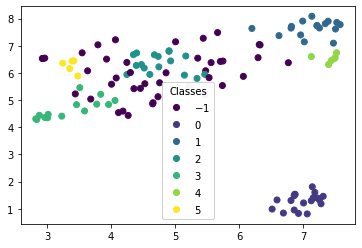

In [169]:
import matplotlib.pyplot as plt
#rename clusters
name_map = {-1:"Unclassified",0: "legumes",1: "herbs and spices",2: "squash and fruit",3: "salad greens + brassicas", 4: "peppers" , 5:"root vegetables"}
fig, ax = plt.subplots()
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters,label=labels, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes")


### Awesome, we see that most of the vegetable classes are in the same dimensional space, while legumes are distinctly far away. This makes sense, considering legumes are seeds, and have mostly unique culinary applications compared to other vegetables. They can be used as protein sources! BEANS WIN AGAIN!